# DEMO: Mô hình CNN đơn giản dùng để phân loại hình ảnh
Dataset: cifar10

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [52]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

batch_size = 64
epochs = 30

# Compile model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Tạo callback ModelCheckpoint để lưu model tốt nhất
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy',
                             save_best_only=True, mode='max', verbose=1)

# Tạo callback CSVLogger để lưu lịch sử huấn luyện
csv_logger = CSVLogger('training_history.csv', append=True)

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.1, callbacks=[checkpoint, csv_logger])

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          23,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,442 (165.79 KB)

 Trainable params: 42,442 (165.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3271 - loss: 1.8356
Epoch 1: val_accuracy improved from -inf to 0.53300, saving model to best_model.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3273 - loss: 1.8350 - val_accuracy: 0.5330 - val_loss: 1.3253
Epoch 2/30
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5215 - loss: 1.3572
Epoch 2: val_accuracy improved from 0.53300 to 0.59520, saving model to best_model.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 75ms/step - accuracy: 0.5216 - loss: 1.3571 - val_accuracy: 0.5952 - val_loss: 1.1733
Epoch 3/30
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5689 - loss: 1.2251
Epoch 3: val_accuracy improved from 0.59520 to 0.62620, saving model to best_model.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 81s 74ms/step - accuracy: 0.5690 - loss: 1.2251 - val_accuracy: 0.6262 - val_loss: 1.0935
Epoch 4/30
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5985 - loss: 1.1564
Epoch 4: val_accuracy did not i

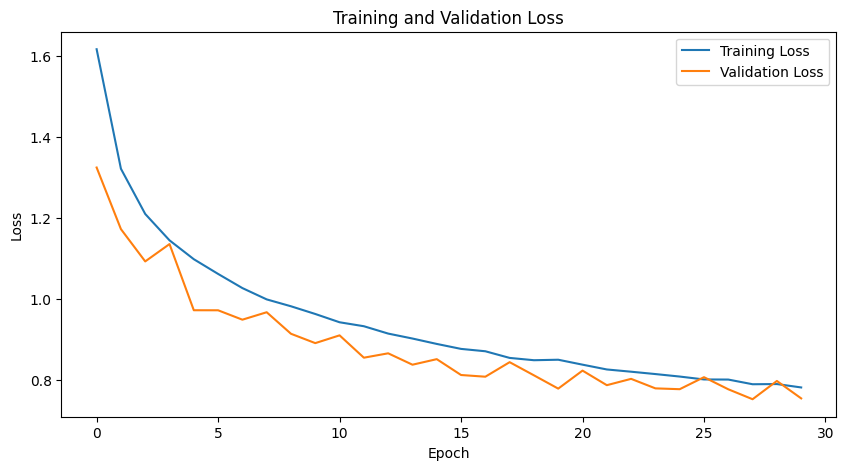

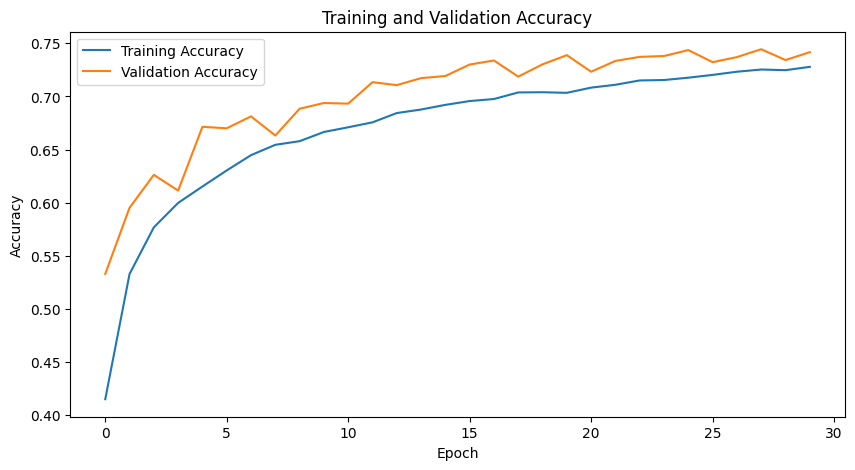

In [53]:
import pandas as pd

# Đọc dữ liệu lịch sử huấn luyện từ file CSV
history = pd.read_csv('training_history.csv')

# Vẽ biểu đồ Loss
plt.figure(figsize=(10, 5))  # Kích thước biểu đồ
plt.plot(history['epoch'], history['loss'], label='Training Loss')
plt.plot(history['epoch'], history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history['epoch'], history['accuracy'], label='Training Accuracy')
plt.plot(history['epoch'], history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [68]:
# Chọn một mẫu ngẫu nhiên từ tập kiểm tra
sample_index = np.random.randint(x_test.shape[0])
sample_image = x_test[sample_index]

# Dự đoán nhãn của mẫu
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction)

# Lấy tên nhãn từ CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_name = class_names[predicted_label]

# Lấy label gốc của ảnh từ y_test
original_label = y_test[sample_index][0]

# Lấy tên label từ class_names
original_class_name = class_names[original_label]

# In ra label gốc và label dự đoán
print('Original Label:', original_label)
print('Original Class Name:', original_class_name)
print('Predicted Label:', predicted_label)
print('Predicted Class Name:', predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Original Label: 7
Original Class Name: horse
Predicted Label: 7
Predicted Class Name: horse
